### Creating a venv to store dependencies

In [8]:
%%python -m venv venv
%%.\venv\Scripts\activate

### Installing required dependencies

In [9]:
%pip install opencv-python

     --------------------------------------- 39.5/39.5 MB 27.3 MB/s eta 0:00:00
     --------------------------------------- 13.0/13.0 MB 31.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
%pip install numpy matplotlib scikit-image

  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl (8.1 MB)
     --------------------------------------- 12.8/12.8 MB 31.1 MB/s eta 0:00:00
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 2.2/2.2 MB 35.5 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
  Using cached packaging-25.0-py3-none-any.whl (66 kB)
  Using cached pillow-11.2.1-cp311-cp311-win_amd64.whl (2.7 MB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
  Using cached scipy-1.15.3-cp311-cp311-win_amd64.whl (41.2 MB)
     ---------------------------------------- 2.0/2.0 MB 32.6 MB/s eta 0:00:00
     ---------------------------------------- 315.8/315.8 kB ? eta 0:00:00
     ------------------------------------- 230.8/230.8 kB 13.8 MB/s eta 0:00:00
  Using cached six-1.17.0-py2.py3-none-


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing libraries

If getting error for the matplotlib in jupyter notebook, restart the kernel.

In [1]:
import numpy as np
import cv2
from skimage import io
import matplotlib.pyplot as plt

print("OpenCV-Python Version {}".format(cv2.__version__))

OpenCV-Python Version 4.11.0


## Problem-1

### 1. Read and display the original image in colour

Using OpenCV's `imread()` function, we read the image file in its original color format (BGR). Then display image with matplotlib library.

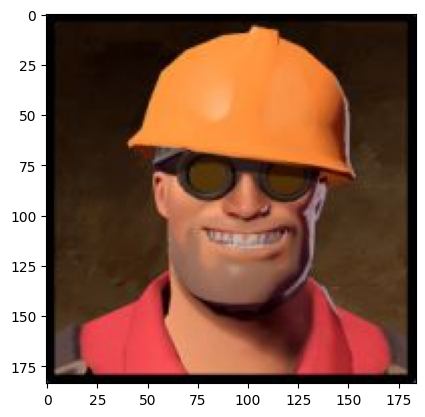

In [37]:
input_image = cv2.imread('./data/tf2_engineer.jpg')
image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

### 2. Find the centre of the image and print intensity value

To find the center coordinates:
1. Get image dimensions using `image.shape`
2. Calculate center (`height//2`, `width//2`)
3. Convert image to grayscale to get a single intensity value
4. Access the pixel value at center coordinates

In [38]:
height, width, _ = image.shape
center_y = height // 2
center_x = width // 2
print(f"Center coordinates: (x={center_x}, y={center_y})")

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
center_intensity = gray_image[center_y, center_x]
print(f"Intensity value at center: {center_intensity}")

Center coordinates: (x=92, y=92)
Intensity value at center: 113


### 3. Place a rectangular colour patch

Drawing a rectangle centered on the image:
1. Convert hex color (#329ea8) to BGR format
2. Calculate rectangle coordinates (centered, 30px height, 40px width)
3. Create a copy of original image to preserve it
4. Draw filled rectangle using `cv2.rectangle()` with calculated parameters

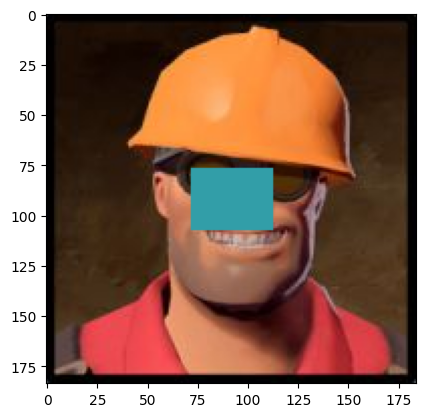

In [39]:
hex_color = "#329ea8"
# Convert hex to BGR (for OpenCV)
color = tuple(int(hex_color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))[::-1]

# Rectangle coordinates
rect_height = 30
rect_width = 40
rect_x1 = center_x - rect_width // 2
rect_y1 = center_y - rect_height // 2
rect_x2 = rect_x1 + rect_width
rect_y2 = rect_y1 + rect_height

# Convert image back to BGR for OpenCV operations
colored_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
cv2.rectangle(colored_image, (rect_x1, rect_y1), (rect_x2, rect_y2), color, -1)
# Convert back to RGB for matplotlib display
colored_image = cv2.cvtColor(colored_image, cv2.COLOR_BGR2RGB)

plt.imshow(colored_image)
plt.show()

### 4. Print intensity value at patch center

Get the intensity value at the center of the colored patch:
1. Use the same center coordinates as before
2. Access the grayscale value at this position
3. Print the intensity value

In [40]:
updated_gray_image = cv2.cvtColor(cv2.cvtColor(colored_image, cv2.COLOR_RGB2BGR), cv2.COLOR_BGR2GRAY)
patch_center_intensity = updated_gray_image[center_y, center_x]
print(f"Intensity value at center of color patch: {patch_center_intensity}")

Intensity value at center of color patch: 127


### 5. Display final image with patch

Display the modified image:
1. Add text showing intensity value at center of patch
2. Configure text properties (font, scale, color)
3. Calculate text position to center it in the patch
4. Display final image with both colored patch and intensity value

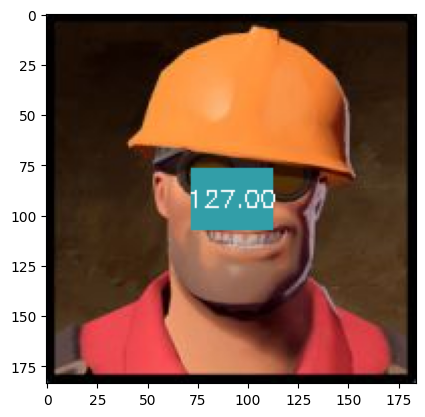

In [41]:
text = f"{patch_center_intensity:.2f}"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.4
text_color = (255, 255, 255)
thickness = 1

rect_avg_color = color[::-1]

# Position the text at the center of the rectangle
text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]
text_x = center_x - text_size[0] // 2
text_y = center_y + text_size[1] // 2

cv2.putText(colored_image, text, (text_x, text_y), font, font_scale, text_color, thickness)

plt.imshow(colored_image)
plt.show()

## Problem-2

### 1. Read and display the original image in grayscale.

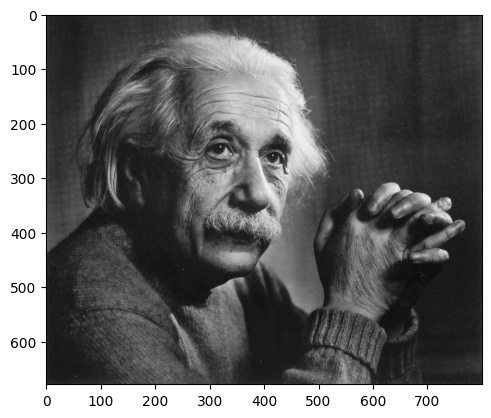

In [42]:
image = cv2.imread("./data/einstein.tif", 0)
plt.imshow(image, cmap='gray')
plt.show()

### 2. Find the negative of the input image.

To find the negative of image there are two ways:
- Using ready-to-use OpenCV2 `bitwise_not` function.
- Substract image from 255 (We subtract from 255 to invert pixel intensities, turning dark areas light and light areas dark.)

In [43]:
img_neg = cv2.bitwise_not(image)
# img_neg = 255 - image

### 3. Display the negative image.

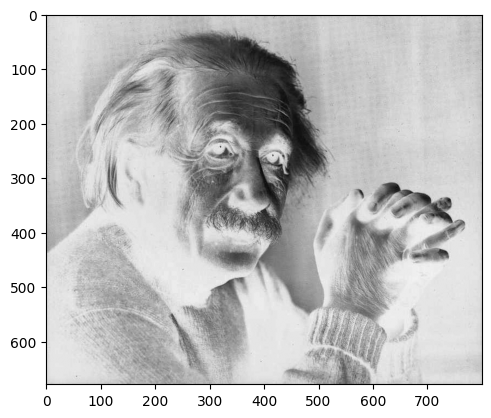

In [44]:
plt.imshow(img_neg, cmap='gray')
plt.show()

### 4. From the original image get the intensity value of 5 random pixels, and from the negative image get the intensity value of same pixels. Print pixel values to show pixel values before and after.

Randomly generated 5 random numbers using random library for x and y and then specified the intensity values at those indexes.

In [45]:
import random

height, width = image.shape
random_pixels_x = random.sample(range(0, width), 5)
random_pixels_y = random.sample(range(0, height), 5)

# Original image
print("\n---Original Image---")
for i in range(5):
    print(f"Intensity value at index ({random_pixels_y[i]},{random_pixels_x[i]}): ", image[random_pixels_y[i]][random_pixels_x[i]])

# Negative image
print("\n---Negative Image---")
for i in range(5):
    print(f"Intensity value at index ({random_pixels_y[i]},{random_pixels_x[i]}): ", img_neg[random_pixels_y[i]][random_pixels_x[i]])


---Original Image---
Intensity value at index (129,61):  102
Intensity value at index (338,291):  134
Intensity value at index (238,407):  118
Intensity value at index (537,95):  111
Intensity value at index (65,119):  105

---Negative Image---
Intensity value at index (129,61):  153
Intensity value at index (338,291):  121
Intensity value at index (238,407):  137
Intensity value at index (537,95):  144
Intensity value at index (65,119):  150


## Problem 3

### 1. Read and display the original image in grayscale.

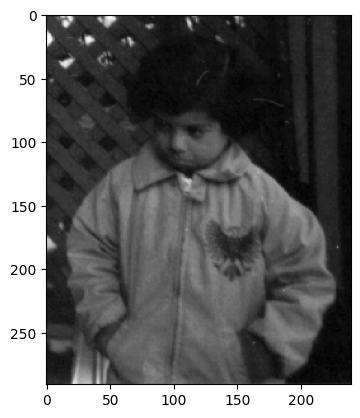

In [46]:
gray_image = cv2.imread("./data/pout.tif", 0)
plt.imshow(gray_image, cmap='gray')
plt.show()

### 2. Apply log transform to original image and display the result.

I applied a logarithmic transformation to the original image to enhance the visibility of darker regions. This method compresses the dynamic range of pixel intensities, making low-intensity values more distinguishable while suppressing high-intensity values.

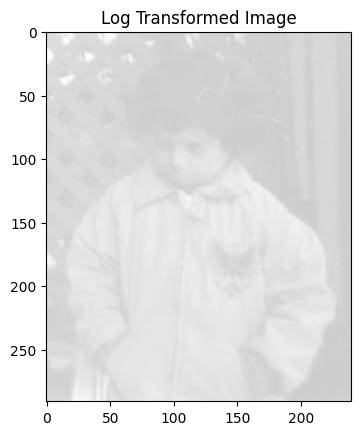

In [47]:
image = cv2.imread('./data/pout.tif')
c = 255 / np.log(1 + np.max(image))
log_image = c * (np.log(image + 1))
log_image = np.array(log_image, dtype = np.uint8)

plt.imshow(log_image)
plt.title("Log Transformed Image")
plt.show()

### 3. Apply inverse log transform to original image and display the result.

In here I apply an inverse logarithmic transformation using the formula `g(x,y) = e^(f(x,y)/c) - 1` to enhance dark regions in the image. Transformation expands the dynamic range of darker pixels.

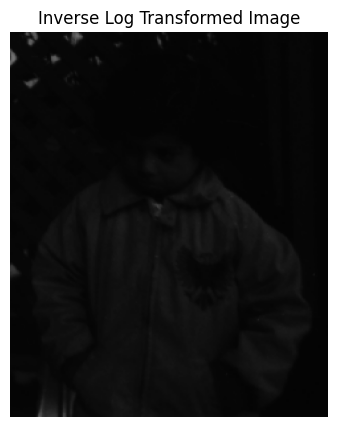

In [48]:
inverse_log_image = np.exp(image / c) - 1
inverse_log_image = np.array(inverse_log_image, dtype=np.uint8)

plt.figure(figsize=(15, 5))
plt.imshow(inverse_log_image, cmap='gray')
plt.title('Inverse Log Transformed Image')
plt.axis('off')
plt.show()

### 4. Apply inverse log transform to image you get from step 2 and display the result.

I applied the inverse log transformation to the image obtained from the log transform.  The purpose is to reconstruct the original intensity values by reversing the compression applied in the log step.

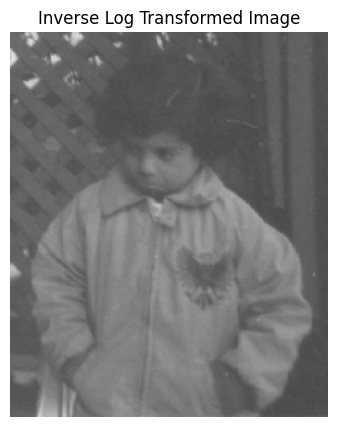

In [49]:
inverse_log_image = np.exp(log_image / c) - 1
inverse_log_image = np.array(inverse_log_image, dtype=np.uint8)

plt.figure(figsize=(15, 5))
plt.imshow(inverse_log_image, cmap='gray')
plt.title('Inverse Log Transformed Image')
plt.axis('off')
plt.show()

### 5. Comment on the images you get from step 2 and step 4.

In step 2, it enhances darker pixels of the image to make them more visible. Brighter pixels are compressed, reducing their intensity. In step 4, it expands the compressed values back to their original range.

## Problem 4

### 1. Read and display the original image in grayscale.

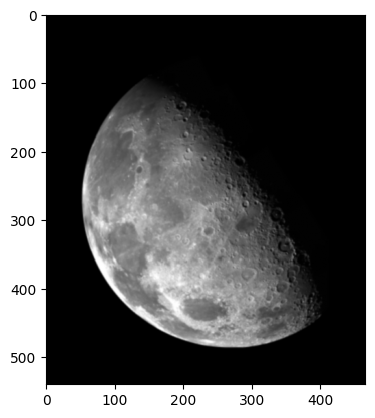

In [50]:
image = cv2.imread("./data/moon.tif", 0)
plt.imshow(image, cmap='gray')
plt.show()

### 2. Apply unsharp masking in spatial domain

I applied unsharp masking in the spatial domain to enhance edges and fine details using g(x,y) = f(x,y) + k*mask(x,y) formula.

- First, I created a blurred version of the image using Gaussian filter.


- Then, I calculated mask by subtracting blurred image from the original image.


- Finally, added the scaled mask back to the original Image using different k values.

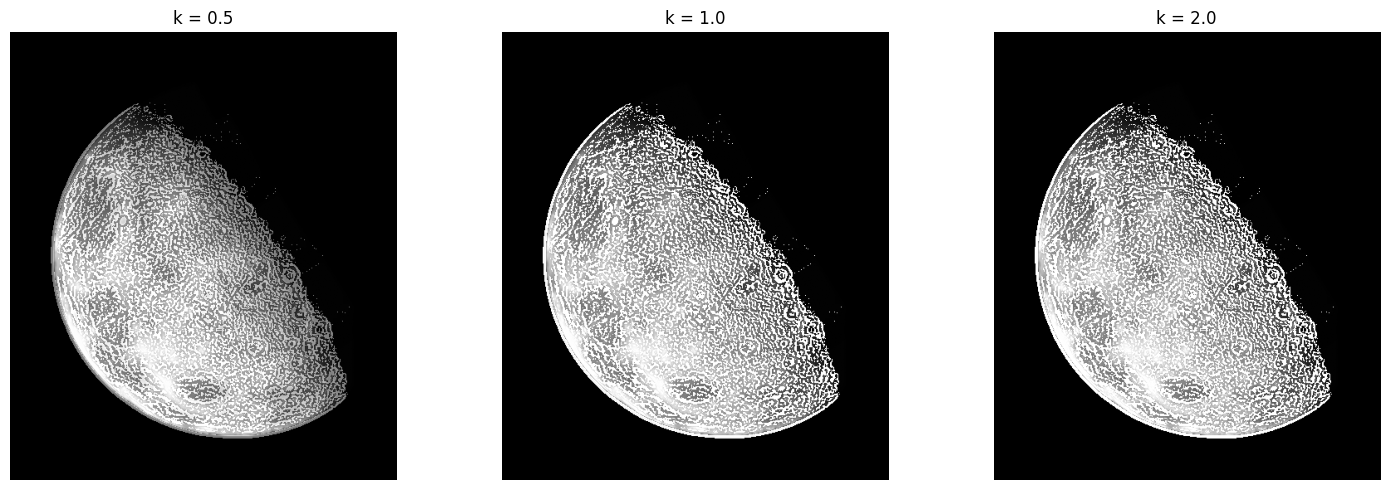

In [52]:
blurred = cv2.GaussianBlur(image, (5,5), 0)

mask = image - blurred

k_values = [0.5, 1.0, 2.0]
plt.figure(figsize=(15, 5))

for i, k in enumerate(k_values, 1):
    sharpened = image + k * mask
    
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
    
    plt.subplot(1, 3, i)
    plt.imshow(sharpened, cmap='gray')
    plt.title(f'k = {k}')
    plt.axis('off')

plt.tight_layout()
plt.show()


### 3. Apply unsharp masking in frequency domain using g(x,y) = F^(-1)[1 + k * H_HP(u,v)]F(u,v)

- I used three different k values (0.5, 1.0, 2.0) as specified, with a Gaussian high-pass filter
- D0=30 is the cut-off frequency selected by trial
- The formula enhances high-frequency components while preserving the original image structure

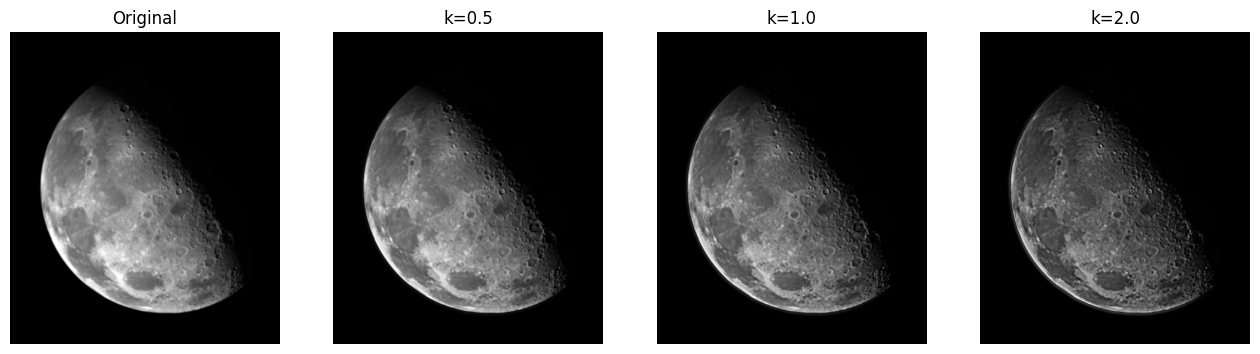

In [53]:
k_values = [0.5, 1.0, 2.0]
D0 = 30

f = np.float32(image)
F = np.fft.fft2(f)
F_shifted = np.fft.fftshift(F)

rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
H_HP = np.zeros((rows, cols), dtype=np.float32)
for i in range(rows):
    for j in range(cols):
        D = np.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
        H_HP[i, j] = 1 - np.exp(-(D ** 2) / (2 * (D0 ** 2)))

results = []
for k in k_values:
    G = F_shifted * (1 + k * H_HP)
    g = np.fft.ifft2(np.fft.ifftshift(G))
    g = np.abs(g)
    g = cv2.normalize(g, None, 0, 255, cv2.NORM_MINMAX)
    results.append(np.uint8(g))

plt.figure(figsize=(16, 6))
plt.subplot(1, len(k_values) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')
for idx, (k, result) in enumerate(zip(k_values, results), 2):
    plt.subplot(1, len(k_values) + 1, idx)
    plt.imshow(result, cmap='gray')
    plt.title(f'k={k}')
    plt.axis('off')
plt.show()

### 4. Display the result from the step 2 side by side with the result from the step 3 for each value of 𝑘.

Fig-1 (k = 0.2), Fig-2 (k=0.5), Fig-3 (k=1)

It creates 2-row comparison: spatial domain (Step 2) vs frequency domain (Step 3) results

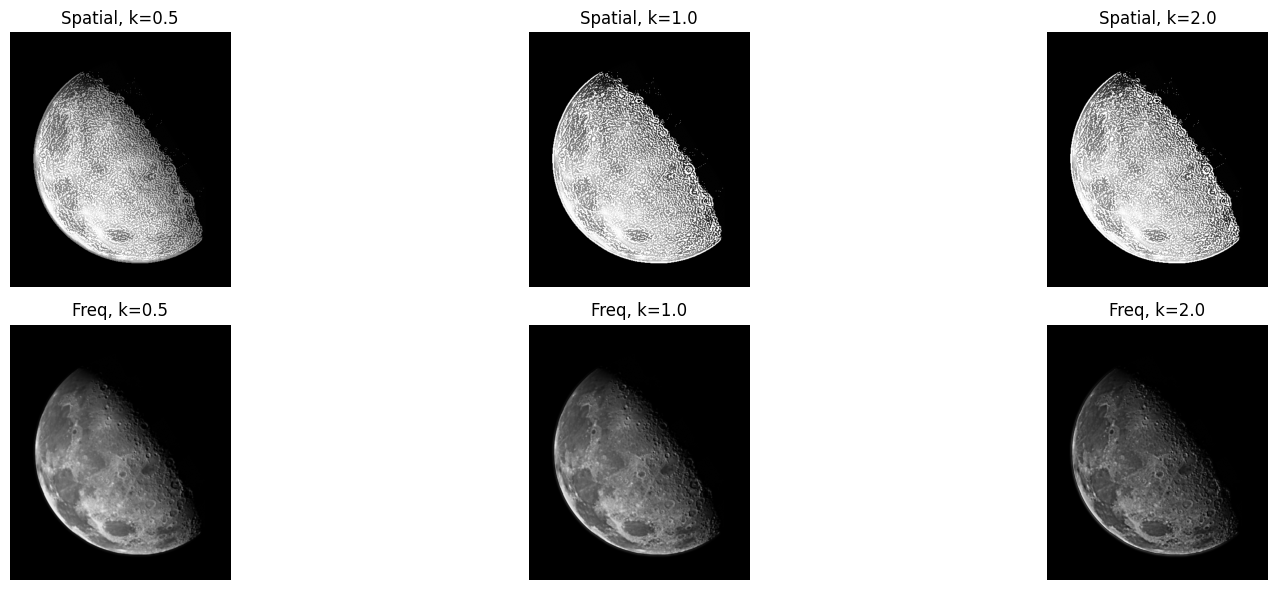

In [54]:
plt.figure(figsize=(18, 6))
for i, k in enumerate(k_values):
    # Step 2 result: spatial domain
    sharpened = image + k * mask
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
    
    # Step 3 result: frequency domain
    freq_result = results[i]
    
    # Plot spatial domain result
    plt.subplot(2, len(k_values), i + 1)
    plt.imshow(sharpened, cmap='gray')
    plt.title(f'Spatial, k={k}')
    plt.axis('off')

    # Plot frequency domain result
    plt.subplot(2, len(k_values), i + 1 + len(k_values))
    plt.imshow(freq_result, cmap='gray')
    plt.title(f'Freq, k={k}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## Problem 5

### 1. Read and display the original image in grayscale.

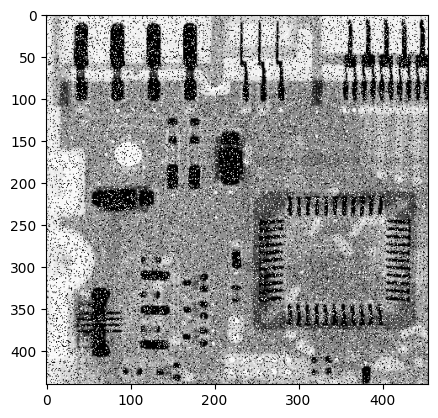

In [65]:
image = cv2.imread("./data/pcb.tif", 0)
plt.imshow(image, cmap='gray')
plt.show()

### 2. Identify and describe the type of noise (e.g., salt-and-pepper, Gaussian) using visual inspection and/or statistical tools (e.g., histogram).

First we need to check the histogram to understand the type of noise. When I checked it I see 2 sharp spikes near 0 and near 255 also the rest of the histogram looks normal. In this case we can understand image has salt-and-pepper noise. Near 0 (black) → “pepper”, Near 255 (white) → “salt”.

In [66]:
plt.figure(figsize=(8, 4))
plt.hist(image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram of PCB Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
mean = np.mean(image)
std = np.std(image)
print(f"Mean intensity: {mean:.2f}")
print(f"Standard deviation: {std:.2f}")

Mean intensity: 144.06
Standard deviation: 82.96


### 3. Remove the noise using proper filtering sequence.

To remove the noise I applied 2 methods:
- Noise reduction using a 19x19 Gaussian lowpass filter kernel with σ = 3.
- Noise reduction using a 7x7 median filter.

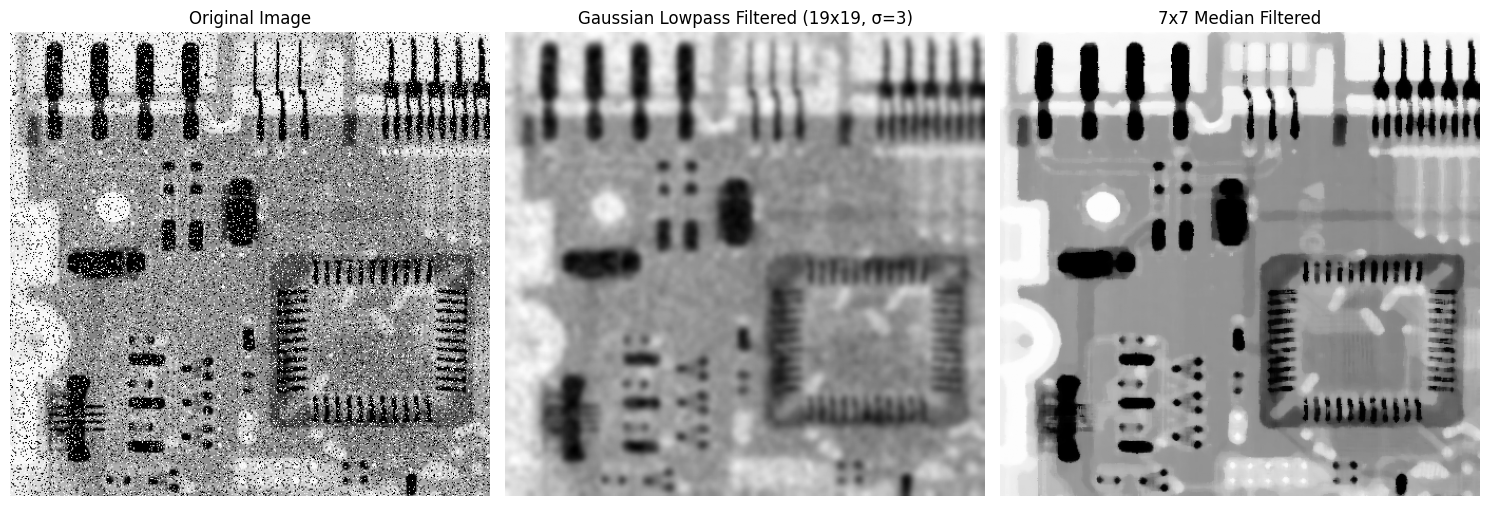

In [57]:
image = cv2.imread("./data/pcb.tif", 0)

gaussian_img = cv2.GaussianBlur(image, (19, 19), 3)

median_img = cv2.medianBlur(image, 7)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(gaussian_img, cmap='gray')
plt.title('Gaussian Lowpass Filtered (19x19, σ=3)')
plt.axis('off')

plt.subplot(133)
plt.imshow(median_img, cmap='gray')
plt.title('7x7 Median Filtered')
plt.axis('off')

plt.tight_layout()
plt.show()


## Problem 6

### 1. Read and display the original image in grayscale.

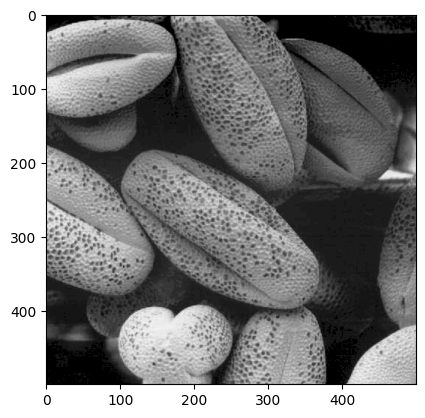

In [58]:
image = cv2.imread("./data/pollen.tif", 0)
plt.imshow(image, cmap='gray')
plt.show()

### 2. Comment on the problem presented at that image. While commenting on the problem, provide proofs (numerical, visual, statistical etc.)

Image is slightly blurry and low contrast, with fine surface detail and not very sharp.

Proofs:

- Histogram: Pixel values are tightly grouped between 90 and 140 (low dynamic range), which is a sign of low contrast.

Stats:

- Mean intensity: ~109

- Std deviation: ~11.5 (low variation)

- Pixel range: [91, 138] → Not using full 0–255 range

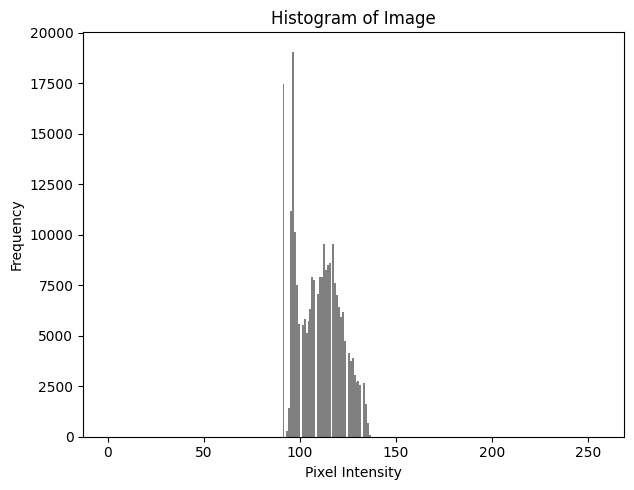

Mean intensity: 109.08
Std deviation: 11.49
Pixel range: [91, 138]


In [59]:
mean = np.mean(image)
std = np.std(image)
min_val, max_val = np.min(image), np.max(image)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram of Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(f"Mean intensity: {mean:.2f}")
print(f"Std deviation: {std:.2f}")
print(f"Pixel range: [{min_val}, {max_val}]")

### 3. Use two independent approaches to solve the problem.

I enhanced the image using 2 independent approaches:

-> Method 1: Histogram Equalization
- This improves global contrast by spreading intensity.

-> Method 2: Laplacian Filter
- This enhances edges and textures.

In [60]:
# Method 1:
equalized_image = cv2.equalizeHist(image)

# Method 2:
laplacian_image = cv2.Laplacian(image, cv2.CV_64F)
sharpened_image = cv2.convertScaleAbs(image - 0.7 * laplacian_image)


### 4. For each solution, display the results.

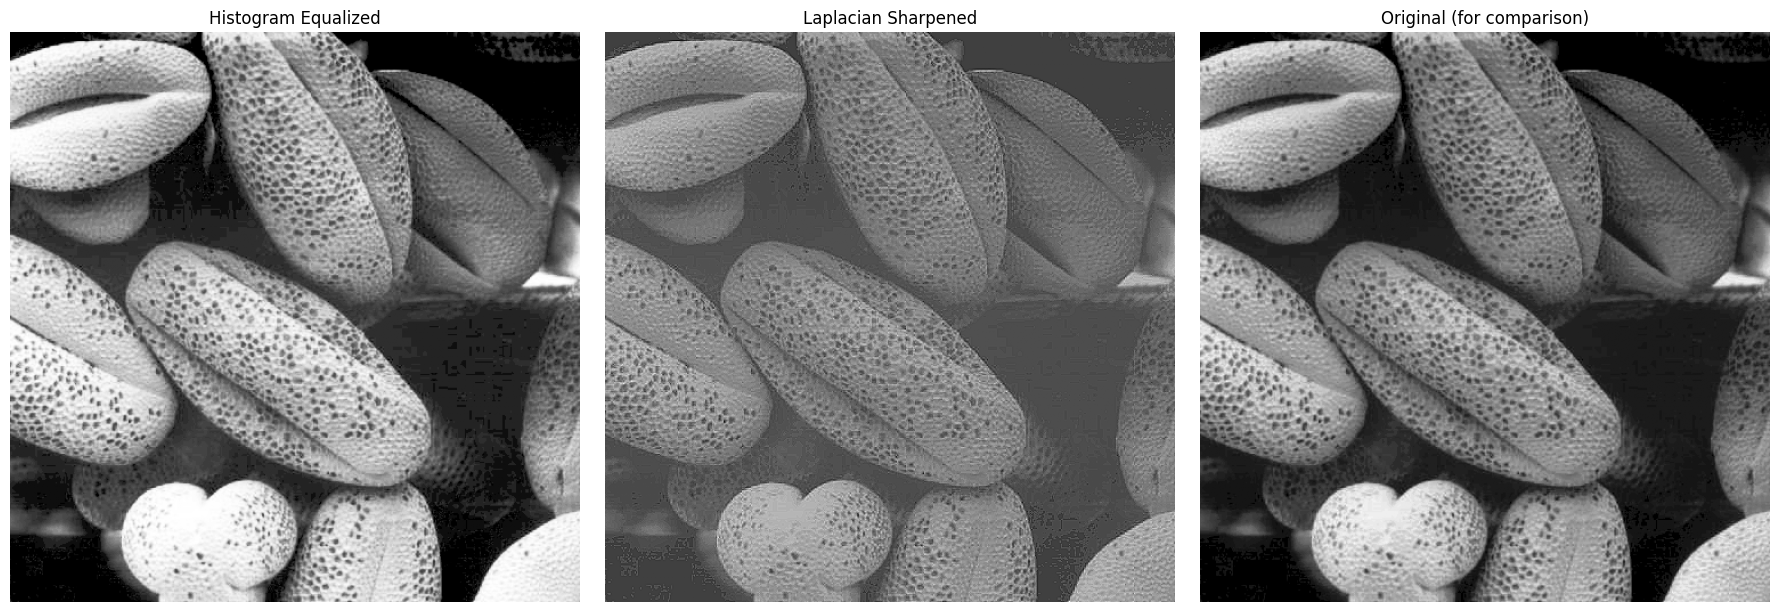

In [61]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Laplacian Sharpened')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image, cmap='gray')
plt.title('Original (for comparison)')
plt.axis('off')

plt.tight_layout()
plt.show()

### 5. For each solution, justify your answer by providing proofs (numerical, visual, statistical etc.).

- Histogram Equalization stretched the contrast significantly, as shown by both the wider range of intensity and higher std deviation.

- Laplacian sharpening selected edges moderately, with a modest increase in standard deviation indicating stronger local gradients.

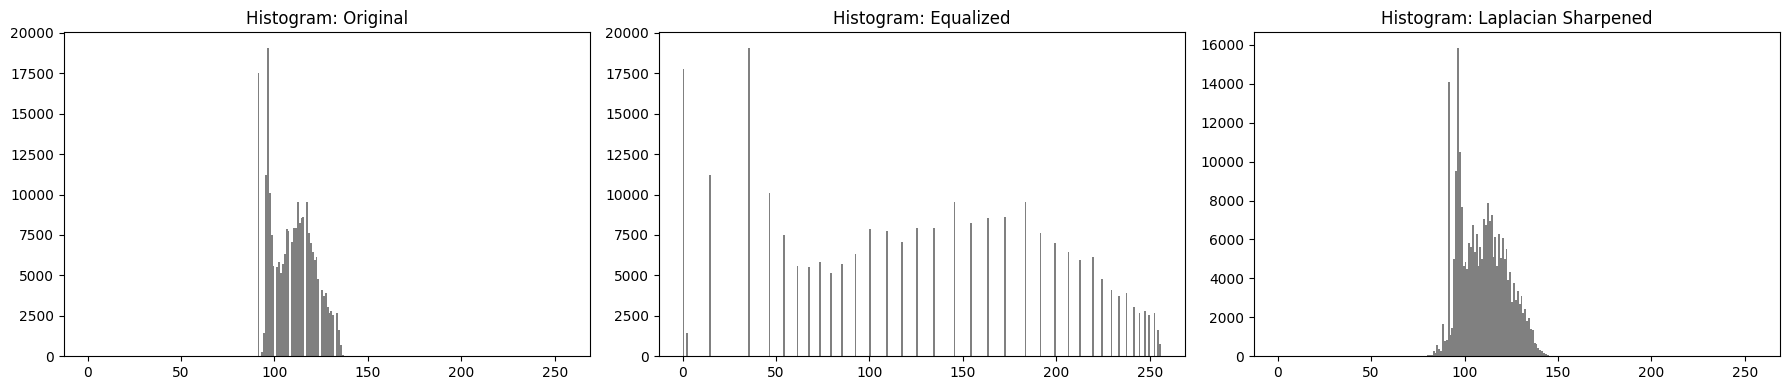

Original Image:
 - Mean: 109.08
 - Std Deviation: 11.49
 - Min-Max: [91, 138]

Histogram Equalized:
 - Mean: 122.68
 - Std Deviation: 77.39
 - Min-Max: [0, 255]

Laplacian Sharpened:
 - Mean: 109.08
 - Std Deviation: 12.63
 - Min-Max: [67, 163]



In [62]:
def display_stats(title, img):
    print(f"{title}:")
    print(f" - Mean: {np.mean(img):.2f}")
    print(f" - Std Deviation: {np.std(img):.2f}")
    print(f" - Min-Max: [{np.min(img)}, {np.max(img)}]\n")

plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram: Original')

plt.subplot(1, 3, 2)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram: Equalized')

plt.subplot(1, 3, 3)
plt.hist(sharpened_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Histogram: Laplacian Sharpened')

plt.tight_layout()
plt.show()

display_stats("Original Image", image)
display_stats("Histogram Equalized", equalized_image)
display_stats("Laplacian Sharpened", sharpened_image)